In [52]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set() # setting seaborn default for plots
import pandas as pd

In [147]:
import numpy as np
from pandas.io.json import json_normalize

In [113]:
import requests
from bs4 import BeautifulSoup as bs
from tqdm import tqdm_notebook as tqdm
import json
import urllib.request

In [3]:
import pandas as pd
prod= pd.read_csv('../data/new_product.csv')
cust= pd.read_csv('../data/new_custom.csv')
mast= pd.read_csv('../data/new_master.csv')
sess= pd.read_csv('../data/new_session.csv')
lotte_list = pd.read_csv('../data/lotte_luxury_list.csv')
sear1 = prod= pd.read_csv('../data/new_search1.csv')

In [5]:
prod['PD_BRA_NM'] = prod['PD_BRA_NM'].map(lambda x: x.split('(')[0].replace('[','').replace(']','').replace(' ',''))
prod.loc[prod['PD_BRA_NM']=='MADE IN ITALY','PD_BRA_NM'] = 'V73'
prod.loc[prod['PD_BRA_NM'].isin(['1909535','19330640825']),'PD_BRA_NM'] = 'KL'
prod.loc[prod['PD_BRA_NM']=='19386640906','PD_BRA_NM'] = '지이크'
prod.loc[prod['PD_BRA_NM'].isin(['1907517','1924113','1906469','1906471','1902295','1908178','1881326','1924116','1906492','1902287']),'PD_BRA_NM'] = 'CC collect'
prod.loc[prod['PD_BRA_NM'].isin(['19379580904','19364580830','1872892','1898551','18703070925','19359410830']),'PD_BRA_NM'] = '더아이잗'
prod.loc[prod['PD_BRA_NM'].isin(['1904418','1896342']),'PD_BRA_NM'] = '보니스팍스'
prod.loc[prod['PD_BRA_NM'].isin(['1912506','1912518']),'PD_BRA_NM'] = '리스트'
prod.loc[prod['PD_BRA_NM']=='19326280823','PD_BRA_NM'] = 'ENC'
prod.loc[prod['PD_BRA_NM'].isin(['19266920905','19266920905','19266920905']),'PD_BRA_NM'] = '요하넥스'
prod.loc[prod['PD_BRA_NM']=='1913802','PD_BRA_NM'] = '꼼빠니아'
prod.loc[prod['PD_BRA_NM']=='1917759','PD_BRA_NM'] = '인디안'

In [6]:
prod_mast = pd.merge(prod, mast, how = 'inner', on=['PD_C'])

# df[df['PD_BUY_CT']>=150000].sort_values(by=['PD_BUY_AM'],ascending=False)
cate_list= ['패션잡화','여성의류','화장품/뷰티케어','남성의류']
prod_mast1 = prod_mast[prod_mast['CLAC1_NM'].isin(cate_list)]

In [7]:
l = ['18703070925','1872892','1881326','1896342','1898551','1902287','1902295','1904418','1906469','1906471','1906492','1907517','1908178',
     '1912506','1912518','1913802', '1917759','1924113','1924116','19266920905','19326280823','19359410830','19364580830','19379580904']
prod_mast1[prod_mast1['PD_BRA_NM'].isin(l)]

,CLNT_ID,SESS_ID,HITS_SEQ,PD_C,PD_ADD_NM,PD_BRA_NM,PD_BUY_AM,PD_BUY_CT,PD_NM,CLAC1_NM,CLAC2_NM,CLAC3_NM


In [10]:
prod_mast1_sess = pd.merge(prod_mast1, sess, how = 'inner', on=['CLNT_ID', 'SESS_ID'])

In [13]:
df = prod_mast1_sess[prod_mast1_sess['PD_BRA_NM'].isin(lotte_list['BRA_NM'])]

# 최신성

9월 1.0, 8월 0.9, 7월 0.8, 6월 0.7, 5월 0.6, 4월 0.5

In [24]:
df['month'] = df['SESS_DT'].map(lambda x : str(x)[4:6]).astype('int64')

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [33]:
df['fe1_test'] = (df['month']+1)/10

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [38]:
fe1 = df[['PD_C', 'fe1_test']].groupby(by='PD_C').sum()

# 관심도

시간, 페이지조회건수

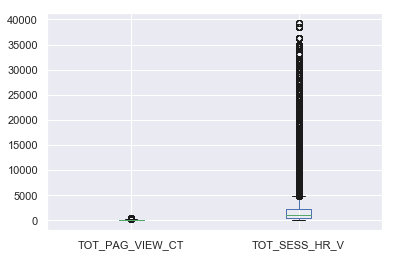

In [57]:
df.boxplot(column=['TOT_PAG_VIEW_CT', 'TOT_SESS_HR_V'])

In [72]:
df.TOT_SESS_HR_V.describe()

count    421258.000000
mean       1648.329964
std        1881.570546
min           1.000000
25%         494.000000
50%        1107.000000
75%        2201.000000
max       39329.000000
Name: TOT_SESS_HR_V, dtype: float64

In [93]:
#평균시간보다 높으면 점수+, 낮으면 점수-
#1600~1700 이 0점

df['fe2_1_test'] = (df.TOT_SESS_HR_V/100).astype('int64')-16
fe2_1 = df[['PD_C', 'fe2_1_test']].groupby(by='PD_C').sum()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [71]:
df.TOT_PAG_VIEW_CT.describe()

count    421258.000000
mean         92.700772
std          91.316441
min           1.000000
25%          32.000000
50%          62.000000
75%         119.000000
max         499.000000
Name: TOT_PAG_VIEW_CT, dtype: float64

In [97]:
#평균뷰보다 높으면 점수+, 낮으면 점수-
#50~100 이 0점

df['fe2_2_test'] = (df['TOT_PAG_VIEW_CT']*2/100).astype('int64')-1
fe2_2 = df[['PD_C', 'fe2_2_test']].groupby(by='PD_C').sum()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


# 인기도

In [170]:
df1 = df.groupby(['CLAC2_NM','CLAC3_NM','PD_BRA_NM']).agg({'PD_BUY_AM':'mean','PD_BUY_CT':'sum'}).reset_index()

In [171]:
bra_list = []
for category in tqdm(df1['CLAC2_NM'].drop_duplicates()):
  for brand in tqdm(df1[df1['CLAC2_NM'] == category]['PD_BRA_NM'].drop_duplicates()):
    a = [brand + category]
    b = [brand + item for item in df1[df1['CLAC2_NM'] == category]['CLAC3_NM'].drop_duplicates()]
    b.extend(a)
    bra_list.append({"groupName": a[0],
                    "keywords": b
                    })

len(bra_list)

907

In [151]:
bra_list

[{'groupName': '겐조남성가방',
  'keywords': ['겐조남성백팩', '겐조남성서류가방', '겐조남성숄더/크로스백', '겐조남성클러치백', '겐조남성가방']},
 {'groupName': '몽블랑남성가방',
  'keywords': ['몽블랑남성백팩',
   '몽블랑남성서류가방',
   '몽블랑남성숄더/크로스백',
   '몽블랑남성클러치백',
   '몽블랑남성가방']},
 {'groupName': '발렌시아가남성가방',
  'keywords': ['발렌시아가남성백팩',
   '발렌시아가남성서류가방',
   '발렌시아가남성숄더/크로스백',
   '발렌시아가남성클러치백',
   '발렌시아가남성가방']},
 {'groupName': '발렌티노남성가방',
  'keywords': ['발렌티노남성백팩',
   '발렌티노남성서류가방',
   '발렌티노남성숄더/크로스백',
   '발렌티노남성클러치백',
   '발렌티노남성가방']},
 {'groupName': '생로랑남성가방',
  'keywords': ['생로랑남성백팩',
   '생로랑남성서류가방',
   '생로랑남성숄더/크로스백',
   '생로랑남성클러치백',
   '생로랑남성가방']},
 {'groupName': '지방시남성가방',
  'keywords': ['지방시남성백팩',
   '지방시남성서류가방',
   '지방시남성숄더/크로스백',
   '지방시남성클러치백',
   '지방시남성가방']},
 {'groupName': '폴스미스남성가방',
  'keywords': ['폴스미스남성백팩',
   '폴스미스남성서류가방',
   '폴스미스남성숄더/크로스백',
   '폴스미스남성클러치백',
   '폴스미스남성가방']},
 {'groupName': '프라다남성가방',
  'keywords': ['프라다남성백팩',
   '프라다남성서류가방',
   '프라다남성숄더/크로스백',
   '프라다남성클러치백',
   '프라다남성가방']},
 {'groupName': '닥스남성가방',
  'keywords': ['닥

In [145]:
client_id = "CVSUj5AE0dvJimFJ1VSd"
client_secret = "ogxRmYWte8"
url = "https://openapi.naver.com/v1/datalab/search"

In [146]:
bra_trend = []
lists = [bra_list[0]]
for i in tqdm(range(1,len(bra_list[:]),4)):
  b_trends = []
  lists.extend(bra_list[i:i+4])
  body = '{\"startDate\":\"2016-01-01\",\"endDate\":\"2019-01-30\",\"timeUnit\":\"month\",\"keywordGroups\":%s}'%json.dumps(lists)
  request = urllib.request.Request(url)
  request.add_header("X-Naver-Client-Id",client_id)
  request.add_header("X-Naver-Client-Secret",client_secret)
  request.add_header("Content-Type","application/json")
  response = urllib.request.urlopen(request, data=body.encode("utf-8"))
  rescode = response.getcode()
  response_body = response.read().decode('utf-8')
  trends = json.loads(response_body)['results']
  for t in trends:
    b_trends.append({
        'title':t['title'],
        'ratio':np.mean([d['ratio'] for d in t['data']])
    })
  bra_trend.extend(b_trends)
  max_b =  max(b_trends, key=lambda x:x['ratio'])
  lists = list(filter(lambda x:x['groupName']==max_b['title'], lists))

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2920: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


NameError: name 'json_normalize' is not defined

In [148]:
brand_mp = json_normalize(bra_trend).drop_duplicates().reset_index()

In [183]:
brand_mp.to_csv('../data/brand_mp.csv')

In [159]:
brand_mp.shape

(918, 3)

In [173]:
brand_mp.head()

,index,ratio,title
0,0,29.183669,겐조남성가방
1,1,34.805190,몽블랑남성가방
2,2,12.521003,발렌시아가남성가방
3,3,11.538457,발렌티노남성가방
4,4,12.539678,생로랑남성가방


In [184]:
t_1 = []
t_2 = []
t_3 = []

for category in df['CLAC2_NM'].unique():
  for brand in df['PD_BRA_NM'].unique():
    t_1.append(category)
    t_2.append(brand)
    t_3.append(brand+category)

In [190]:
t4 = pd.DataFrame({'category':t_1,'brand':t_2,'title':t_3})

In [191]:
brand_mp_1 = pd.merge(brand_mp, t4, how='left', on='title')

In [192]:
brand_mp_1.shape

(918, 5)

In [194]:
brand_mp_1.columns = ['index', 'ratio', 'title', 'CLAC2_NM', 'PD_BRA_NM']

In [195]:
df_1 = pd.merge(df, brand_mp_1, how='left', on=['CLAC2_NM', 'PD_BRA_NM'])

In [196]:
df_1

,CLNT_ID,SESS_ID,HITS_SEQ,PD_C,PD_ADD_NM,PD_BRA_NM,PD_BUY_AM,PD_BUY_CT,PD_NM,CLAC1_NM,...,ZON_NM,CITY_NM,month,fe1_test,fe2_test,fe2_1_test,fe2_2_test,index,ratio,title
0,4139680,7605037,12,642112,색상:워터멜론,바비브라운,39000,1,크러쉬드 립칼라 - 플럼,화장품/뷰티케어,...,Seoul,Seoul,5,0.6,-7,-7,-1,238,68.574678,바비브라운메이크업
1,4139680,7605037,12,642112,색상:워터멜론,바비브라운,39000,1,크러쉬드 립칼라 - 플럼,화장품/뷰티케어,...,Seoul,Seoul,5,0.6,-7,-7,-1,265,58.250632,바비브라운메이크업
2,4139680,7605037,12,642112,색상:워터멜론,바비브라운,39000,1,크러쉬드 립칼라 - 플럼,화장품/뷰티케어,...,Seoul,Seoul,5,0.6,-7,-7,-1,310,17.880933,바비브라운메이크업
3,4139680,7605037,28,642112,색상:카바나,바비브라운,39000,1,크러쉬드 립칼라 - 플럼,화장품/뷰티케어,...,Seoul,Seoul,5,0.6,-7,-7,-1,238,68.574678,바비브라운메이크업
4,4139680,7605037,28,642112,색상:카바나,바비브라운,39000,1,크러쉬드 립칼라 - 플럼,화장품/뷰티케어,...,Seoul,Seoul,5,0.6,-7,-7,-1,265,58.250632,바비브라운메이크업
5,4139680,7605037,28,642112,색상:카바나,바비브라운,39000,1,크러쉬드 립칼라 - 플럼,화장품/뷰티케어,...,Seoul,Seoul,5,0.6,-7,-7,-1,310,17.880933,바비브라운메이크업
6,4139680,7605037,12,642112,색상:카바나,바비브라운,39000,1,크러쉬드 립칼라 - 플럼,화장품/뷰티케어,...,Seoul,Seoul,5,0.6,-7,-7,-1,238,68.574678,바비브라운메이크업
7,4139680,7605037,12,642112,색상:카바나,바비브라운,39000,1,크러쉬드 립칼라 - 플럼,화장품/뷰티케어,...,Seoul,Seoul,5,0.6,-7,-7,-1,265,58.250632,바비브라운메이크업
8,4139680,7605037,12,642112,색상:카바나,바비브라운,39000,1,크러쉬드 립칼라 - 플럼,화장품/뷰티케어,...,Seoul,Seoul,5,0.6,-7,-7,-1,310,17.880933,바비브라운메이크업
9,4139680,7605037,28,642112,색상:워터멜론,바비브라운,39000,1,크러쉬드 립칼라 - 플럼,화장품/뷰티케어,...,Seoul,Seoul,5,0.6,-7,-7,-1,238,68.574678,바비브라운메이크업


In [199]:
del brand_mp['index']
del brand_mp_1['index']

In [216]:
brand_mp_1.head()

,ratio,title,CLAC2_NM,PD_BRA_NM
0,29.183669,겐조남성가방,남성가방,겐조
1,34.805190,몽블랑남성가방,남성가방,몽블랑
2,12.521003,발렌시아가남성가방,남성가방,발렌시아가
3,11.538457,발렌티노남성가방,남성가방,발렌티노
4,12.539678,생로랑남성가방,남성가방,생로랑


In [215]:
tot = pd.concat([fe1, fe2_1, fe2_2], axis=1)

In [233]:
tot = tot.reset_index()

In [222]:
a = df_1[['PD_C' , 'title']]

In [226]:
a.index = df_1.PD_C
del a['PD_C']

In [228]:
a_1 = a.to_dict()

In [ ]:
tot['title'] = tot['PD_C'].map(a_1['title'])

In [237]:
tot.head()

,PD_C,fe1_test,fe2_1_test,fe2_2_test,title
0,2,0.5,-15,-1,스톤헨지보석
1,6,0.5,-8,0,게스여성화
2,79,0.9,-15,-1,투쿨포스쿨메이크업
3,90,0.5,-3,-1,스톤헨지보석
4,202,0.6,-11,0,스톤헨지보석


In [245]:
del tot['PD_C']

In [247]:
tot_gb = tot.groupby(by='title').sum()

In [249]:
tot_gb = tot_gb.reset_index()

In [252]:
tot_gb.shape

(907, 4)

In [253]:
brand_mp_1.shape

(918, 4)

In [254]:
fin = pd.merge(brand_mp_1,tot_gb,how='inner',on=['title'])

In [256]:
fin.shape

(918, 7)

In [262]:
fin.columns = ['인기도','title','CLAC2_NM','PD_BRA_NM','최신성','관심도1','관심도2']

In [264]:
fin.head()

,인기도,title,CLAC2_NM,PD_BRA_NM,최신성,관심도1,관심도2
0,29.183669,겐조남성가방,남성가방,겐조,6.4,-48,-3
1,34.805190,몽블랑남성가방,남성가방,몽블랑,16.0,-88,-2
2,0.806738,몽블랑남성가방,남성가방,몽블랑,16.0,-88,-2
3,12.521003,발렌시아가남성가방,남성가방,발렌시아가,21.3,-2,12
4,11.538457,발렌티노남성가방,남성가방,발렌티노,5.5,-33,1


In [265]:
fin.to_csv(('../data/지수.csv'))